<img src=image/ima1.jpg height=350>

# Preliminary Data Exploration

### Context
The data contains information from the 1990 California census

Dataset downloaded from Kaggle:
"California housing dataset"

The given dataset provides information on various attributes related to housing in different neighborhoods of California. Here is a partial description of the dataset

longitude: The longitude coordinates of the housing location.

latitude: The latitude coordinates of the housing location.

housing_median_age: The median age of houses in a specific neighborhood.

total_rooms: The total number of rooms in a housing unit.

total_bedrooms: The total number of bedrooms in a housing unit.

population: The population count in a specific neighborhood.

households: The number of households in a specific neighborhood.

median_income: The median income of households in a specific neighborhood.

median_house_value: The median value of houses in a specific neighborhood.

ocean_proximity: The proximity of a housing unit to the ocean.

The dataset contains additional information such as labels and counts for different ranges of longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, and median_house_value.

In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:,.1f}'.format

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.2,37.9,41.0,880.0,129.0,322.0,126.0,8.3,"452,600.0",NEAR BAY
1,-122.2,37.9,21.0,"7,099.0","1,106.0","2,401.0","1,138.0",8.3,"358,500.0",NEAR BAY
2,-122.2,37.9,52.0,"1,467.0",190.0,496.0,177.0,7.3,"352,100.0",NEAR BAY
3,-122.2,37.9,52.0,"1,274.0",235.0,558.0,219.0,5.6,"341,300.0",NEAR BAY
4,-122.2,37.9,52.0,"1,627.0",280.0,565.0,259.0,3.8,"342,200.0",NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.1,39.5,25.0,"1,665.0",374.0,845.0,330.0,1.6,"78,100.0",INLAND
20636,-121.2,39.5,18.0,697.0,150.0,356.0,114.0,2.6,"77,100.0",INLAND
20637,-121.2,39.4,17.0,"2,254.0",485.0,"1,007.0",433.0,1.7,"92,300.0",INLAND
20638,-121.3,39.4,18.0,"1,860.0",409.0,741.0,349.0,1.9,"84,700.0",INLAND


In [4]:
data.shape

(20640, 10)

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.isna().any()


longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
# numbers of NA    
data[data.total_bedrooms.isna()]["longitude"].count()
# (207/20640)

207

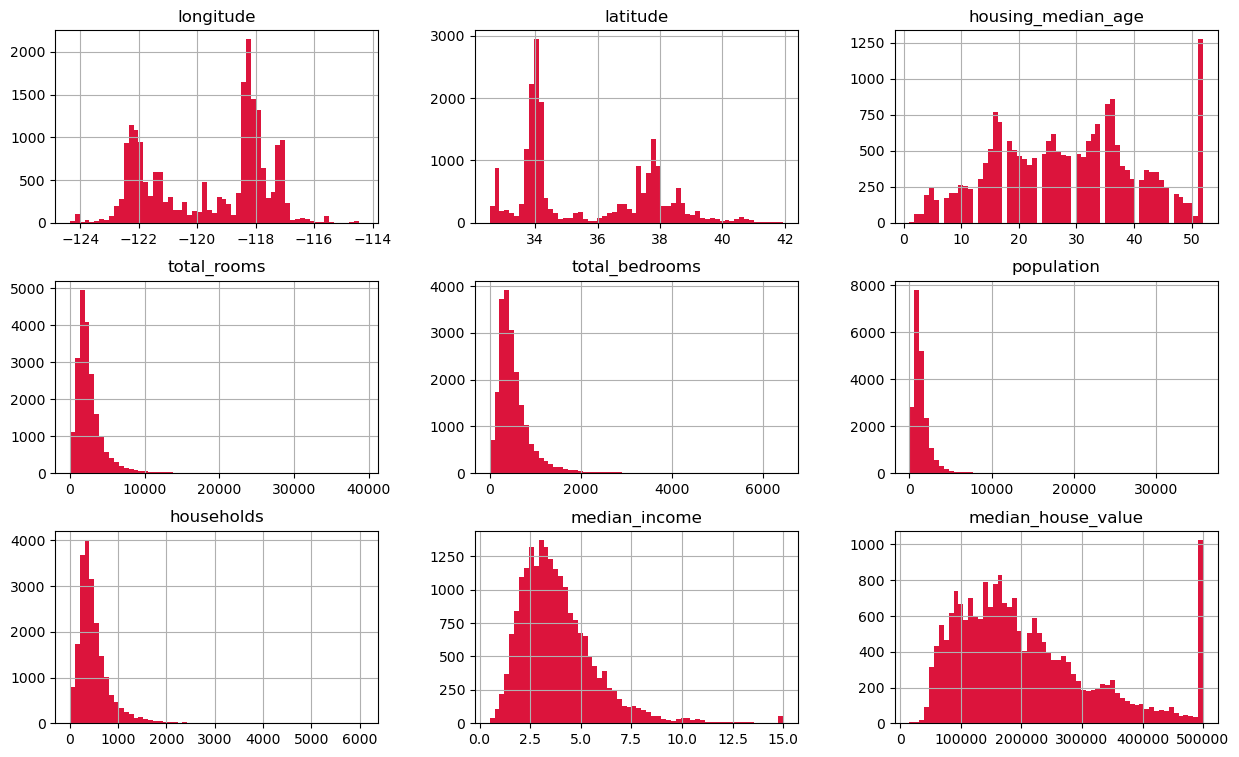

In [9]:
data.hist(bins=60, figsize=(15,9),color="crimson");plt.show()

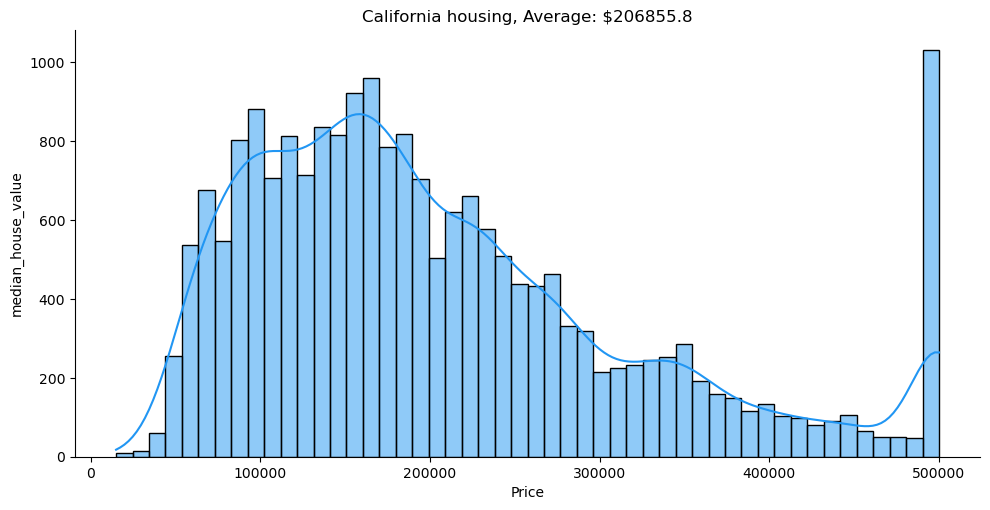

In [10]:
sns.displot(data['median_house_value'], 
            bins=50, 
            aspect=2,
            kde=True, 
            color='#2196f3')

plt.title(f'California housing, Average: ${(data.median_house_value.mean()):.7}')
plt.xlabel('Price')
plt.ylabel('median_house_value')

plt.show()

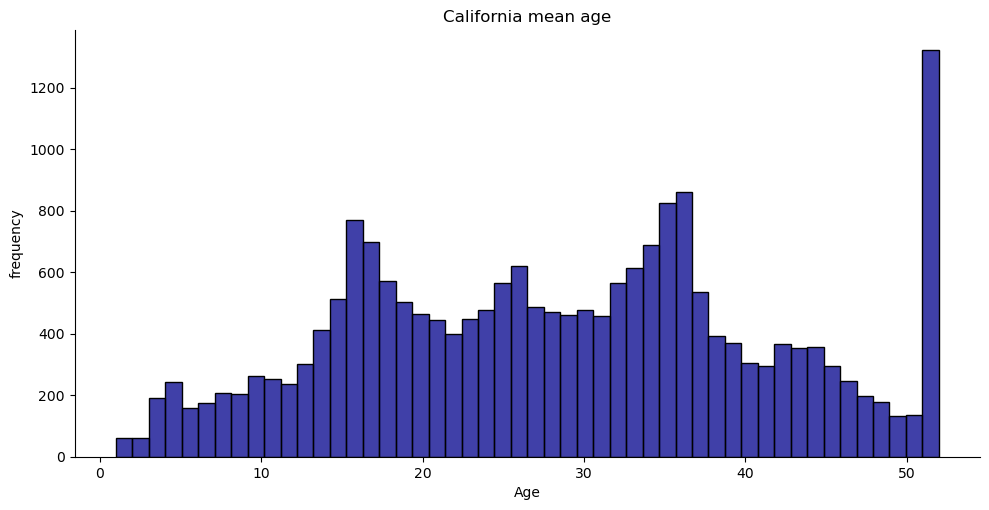

In [11]:
sns.displot(data['housing_median_age'], 
            bins=50, 
            aspect=2,
            color='darkblue')

plt.title(f'California mean age')
plt.xlabel('Age')
plt.ylabel('frequency')

plt.show()

In [12]:
def corrMat(df,id=False):
    
    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat,mask=mask,vmin=-1,vmax=1,center=0, 
                cmap='plasma',square=False,lw=2,annot=True,cbar=False);plt.show()

3.2 | Bivariate correlation matrix
Bivariate (Two Feature) Two-Feature relation ; correlation meature
Very fast way to understand something about the dataset.
Correlation matrix contains only information about the linear similarity of two feature relations
What we might look for:

Often emphasised that too highly or too lowly correlated features should be dropped
Any signs of nonlinearity in the dataset, such as a fair few low linear correlation values
High correlation values between multiple features could indicate that features may represent similar things

C:\Users\Daniele\AppData\Local\Temp\ipykernel_12268\246947784.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr().round(2)
C:\Users\Daniele\AppData\Local\Temp\ipykernel_12268\246947784.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_mat,dtype=np.bool)


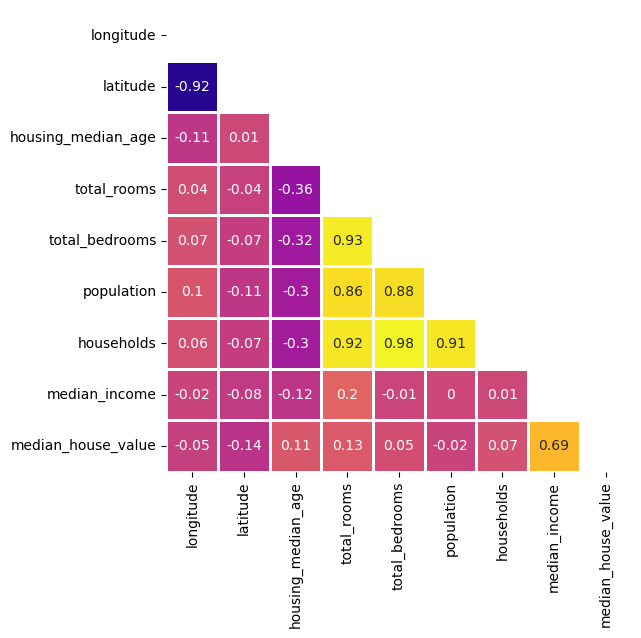

In [13]:
corrMat(data)

Target variable median_house_value is very mildly correlated to all but one feature here: median_income, so one might outline this as an important feature.
A correlation of -0.02 & -0.05 (population/longitude) to the target variable median_house_value might be worth dropping, but they might not be. In fact, a low value isn't exactly a reason to drop a feature. It could simply imply the data is spread quite a lot, which is a strong indicator of nonlinearity.
It is often advised to drop such features, especially for less complex models, as the model probably won't be able to pick up on one feature with such nonlinearity, let alone multiple.
It's possible to plot a shifted matrix, which looks a little nicer, code can be found here

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)? 

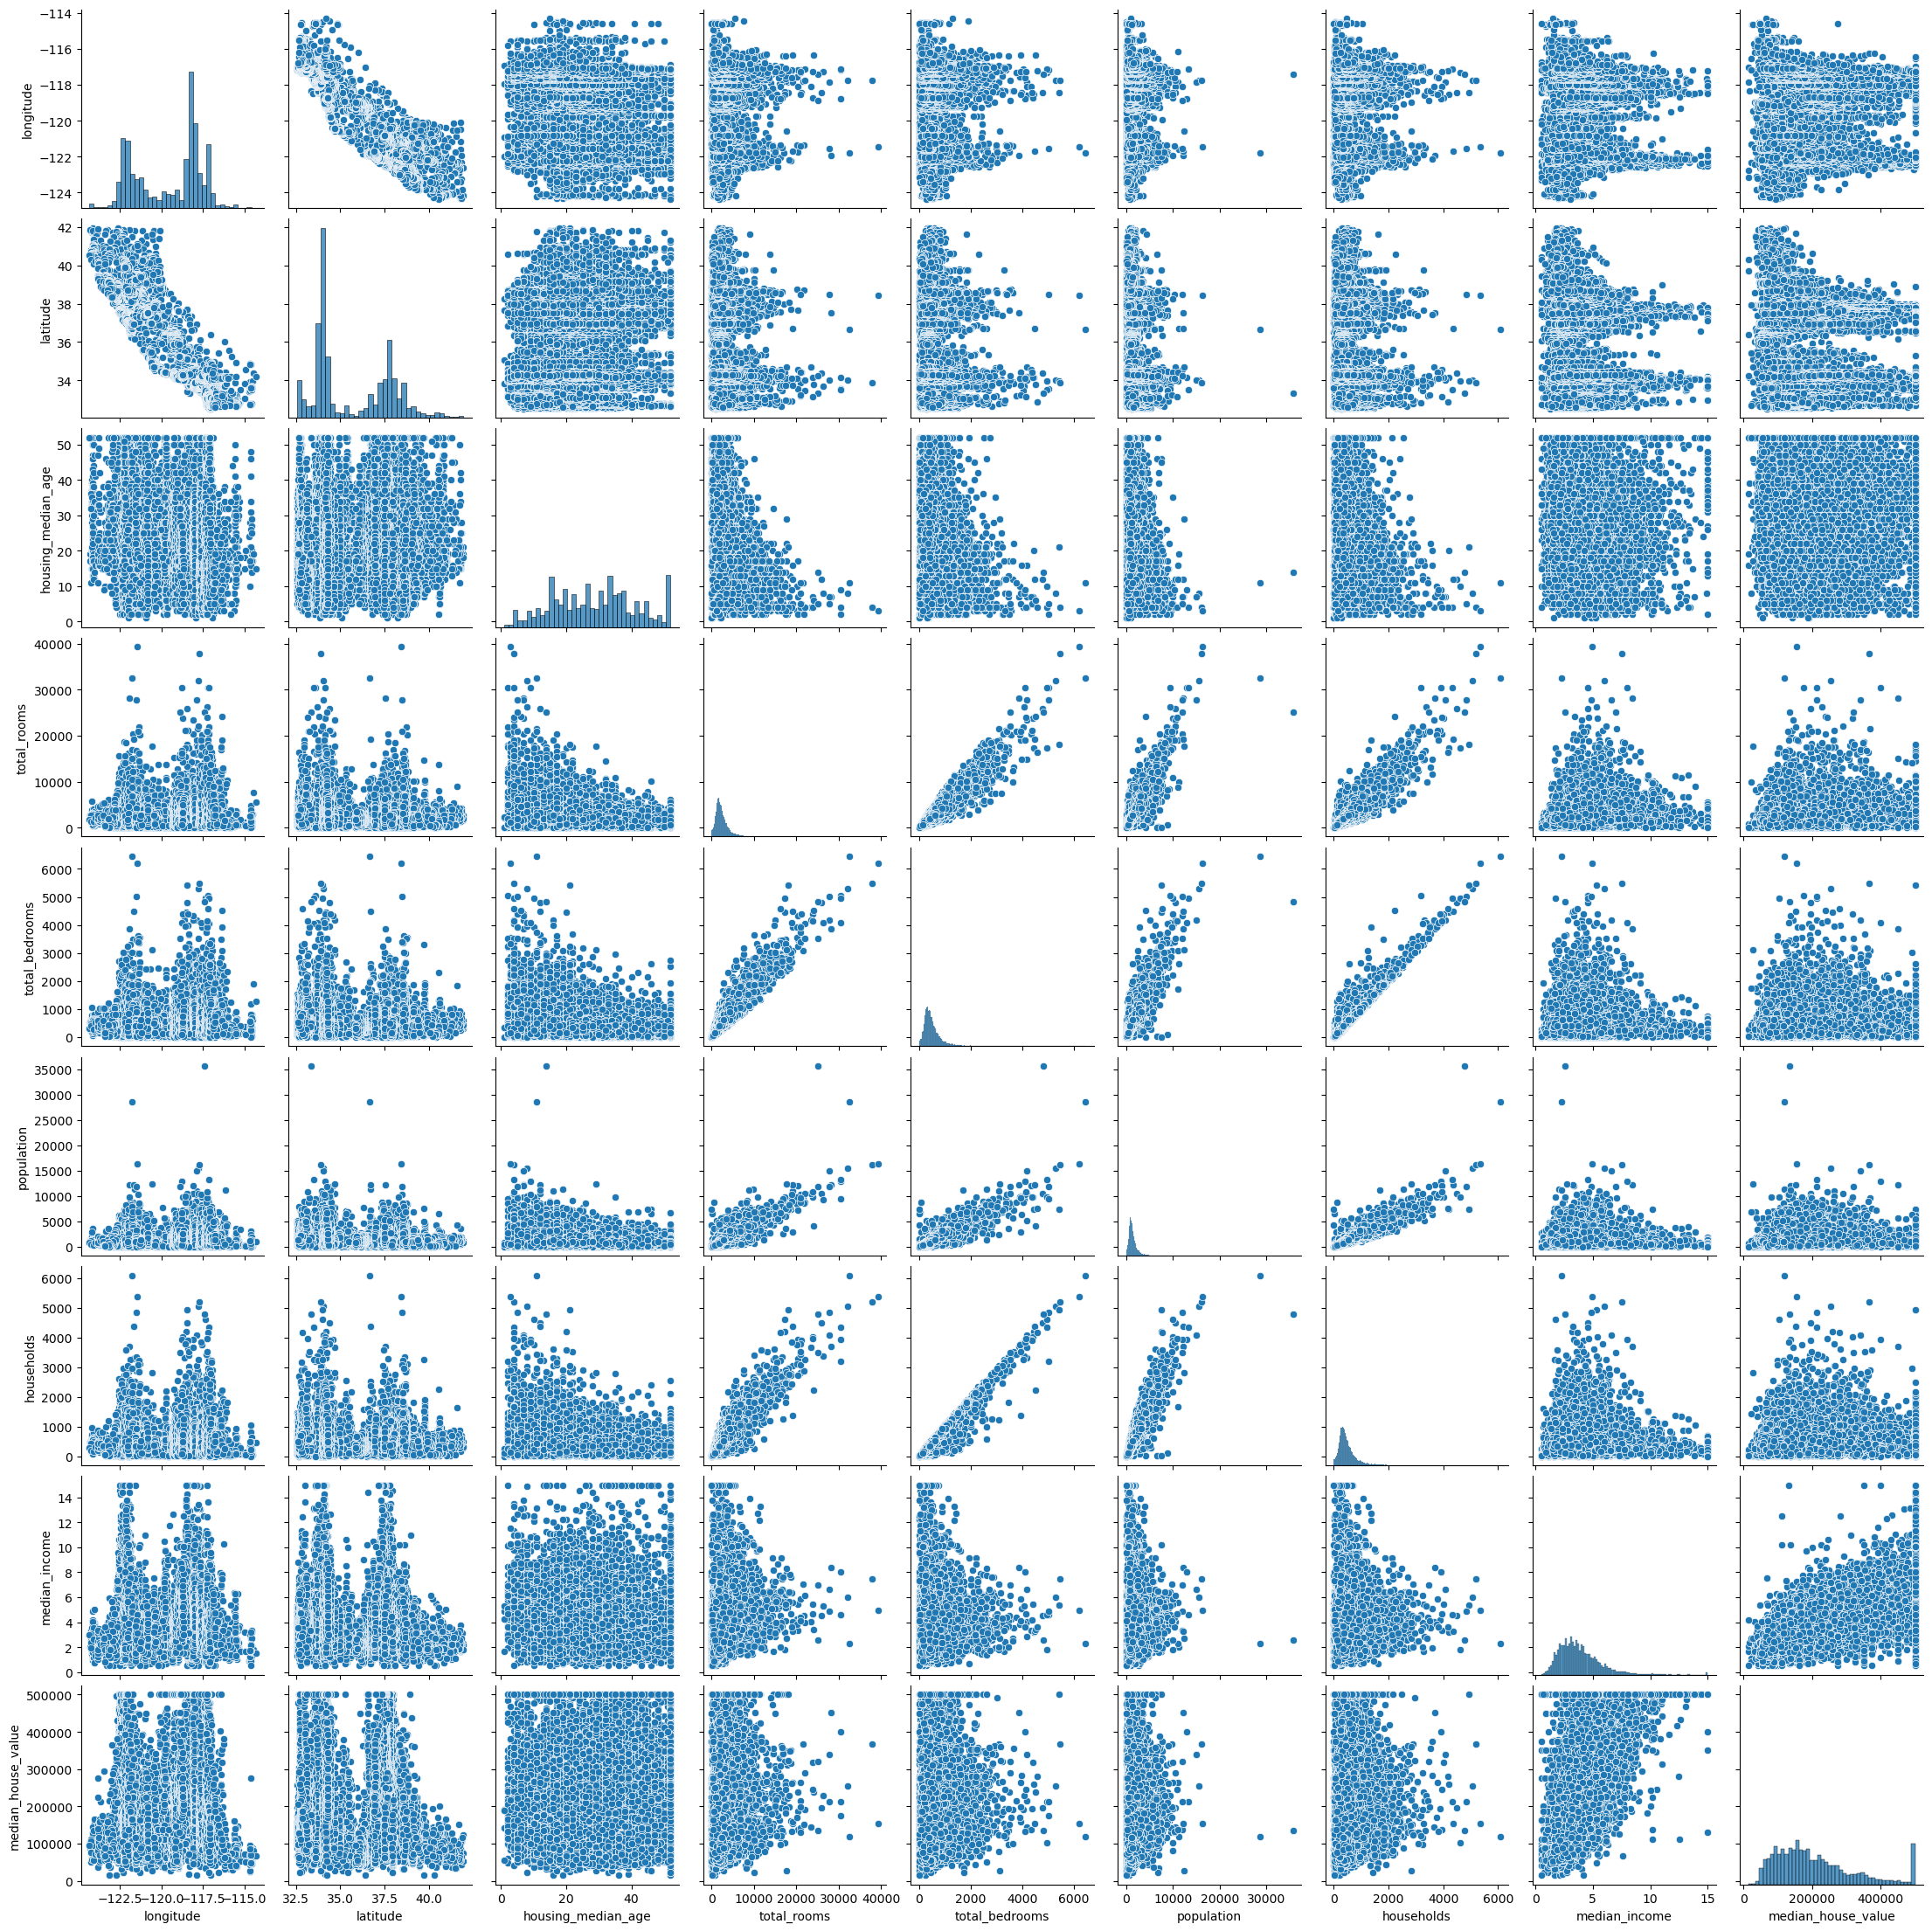

In [14]:
sns.pairplot(data)

We can notice no correlation in the housing_median_age, because that's not a discriminant for other attribute, amd some strong positive correlation between total_rooms, total_bedrooms, population, households

In [15]:
tlist = ['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']
snsPairGrid(data[tlist]) 

NameError: name 'snsPairGrid' is not defined

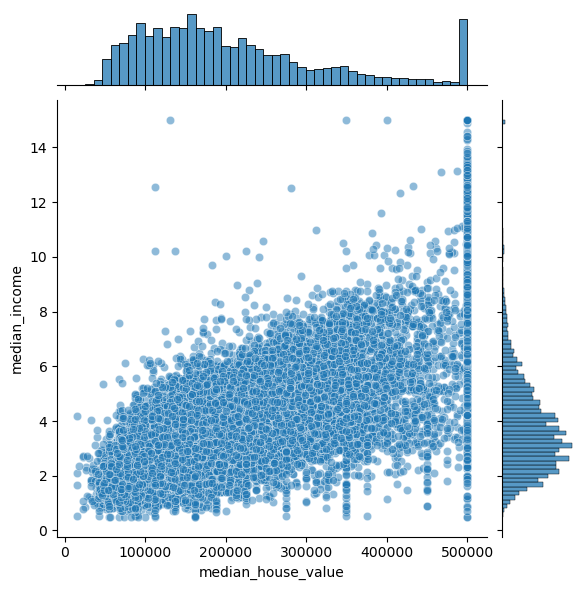

In [18]:
sns.jointplot(data=data, x="median_house_value", y="median_income", joint_kws = {'alpha':.5})

A slightly correlation between median_income and median_house_value

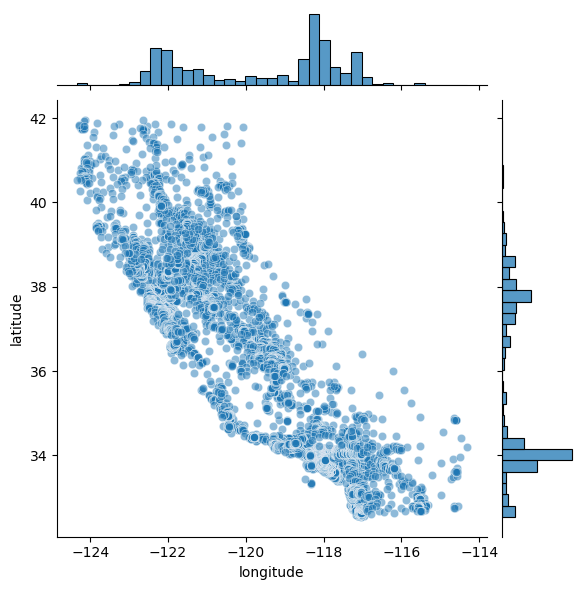

In [26]:
sns.jointplot(data=data, x="longitude", y="latitude", joint_kws = {'alpha':.5})

A negative correlation between longitude and latitude, but that's just the shape of the map

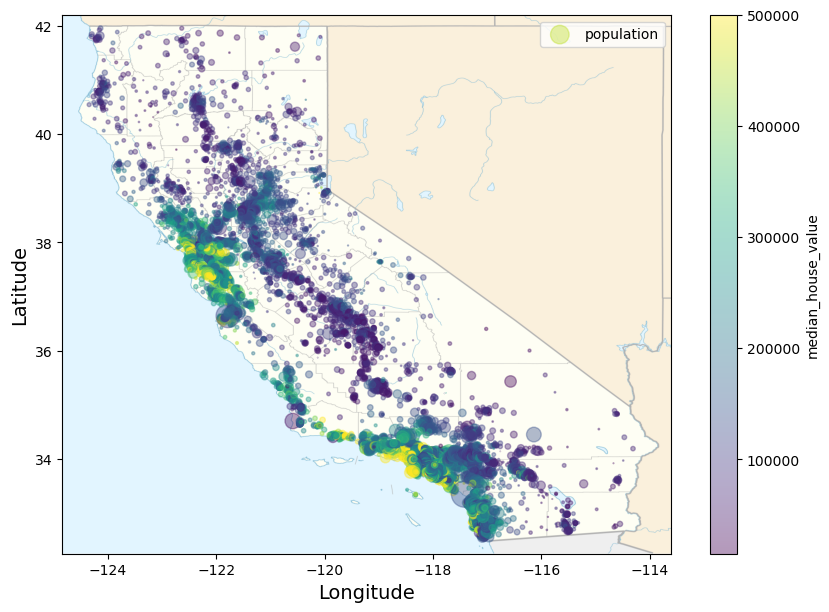

In [99]:
california_img=mpimg.imread('image/california_map.png')
housing_plot = data[['longitude','population','latitude','median_house_value']]
housing_plot.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=housing_plot['population']/100, label='population', figsize=(10,7),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
#[-124.55, -113.80, 32.25, 42.05]

plt.imshow(california_img, extent=[-124.85, -113.60, 32.25, 42.20], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

Visualized on the map the housing with higher population and median_house_value